In [1]:
#### REMOVE in README.md ####
import pycoQC as package
from IPython.core.display import display, Markdown
display(Markdown("# {} {} package documentation\n".format(package.__name__, package.__version__)))
display(Markdown("\n---\n"))
display(Markdown("\n**{}**\n".format(package.__description__)))
display(Markdown("\n---\n"))
display(Markdown("{}\n".format(package.__long_description__)))
display(Markdown("* Author: {} - {}\n".format(package.__author__, package.__email__)))
display(Markdown("* URL: {}\n".format(package.__url__)))
display(Markdown("* Licence: {}\n".format(package.__licence__)))
#############################

# pycoQC 1.0a1 package documentation



---



**PycoQC is a Python 3 package for Jupyter Notebook, computing metrics and generating simple QC plots from the sequencing summary report generated by Oxford Nanopore technologies Albacore basecaller**



---


pycoQC is a very simple quality control package for Nanopore data written in pure python3, meant to be used directly in a jupyter notebook 4.0.0 +. As opposed to current and more exhaustive QC programs for nanopore data, pycoQC is very fast as it relies entirely on the *sequencing_summary.txt* file generated by ONT Albacore Sequencing Pipeline Software 1.2.1+, during base calling. Consequently, pycoQC will only provide metrics at read level metrics (and not at base level). The package supports 1D and 1D2/2D runs analysed with Albacore.

At the time of the package writing, Albacore 1.2.1+ generates a tabulated file with the following fields (the fields in bold are used by pycoQC):

1D run => filename, **read_id**, **run_id**, **channel**, **start_time**, duration, **num_events**, template_start, num_events_template, template_duration, num_called_template, **sequence_length_template**, **mean_qscore_template**, strand_score_template.

2D run => filename1, filename2, read_id1, read_id2, **read_id**, **run_id**, **channel**, **start_time**, **sequence_length_2d**, **mean_qscore_2d**

Please be aware that pycoQC is an experimental package that is still under development. It was tested under Linux Ubuntu 16.04 and in an HPC environment running under Red Hat Enterprise 7.1. You are welcome to raise issues, contribute to the development and submit patches or updates.


* Author: Adrien Leger - aleg@ebi.ac.uk


* URL: https://github.com/a-slide/pycoQC


* Licence: GPLv3


# Installation

Ideally, before installation, create a clean python3 virtual environment to deploy the package, using virtualenvwrapper for example (see http://www.simononsoftware.com/virtualenv-tutorial-part-2/).

In [2]:
#### REMOVE in README.md ####
import pycoQC as package
from IPython.core.display import display, Markdown
if "__install_requires__" in package.__dict__:
    display(Markdown("## Python packages dependencies:\n"))
    for dep in package.__install_requires__:
        display(Markdown("* {}\n".format(dep)))
#############################

## Python packages dependencies:


* numpy>=1.13.0


* pandas>=0.20.0


* matplotlib>=2.0.0


* seaborn>= 0.7.0


* notebook>=4.0.0


## Option 1: Direct installation with pip from github

Install the package with pip3. All the required dependencies will be automatically installed.

In [ ]:
pip3 install git+https://github.com/a-slide/pycoQC.git

To update the package:

In [ ]:
pip3 install git+https://github.com/a-slide/pycoQC.git --upgrade

## Option 2: Clone the repository and install locally in develop mode

With this option, the package will be locally installed in “editable” or “develop” mode. This allows the package to be both installed and editable in project form. This is the recommended option if you wish to participate to the development of the package. As for the option before, the required dependencies will be automatically installed.

In [ ]:
git clone https://github.com/a-slide/pycoQC.git
cd pycoQC
chmod u+x setup.py
pip3 install -e ./

With this option you can also run the testing notebook located in the source directory *pycoQC/test_pycoQC.ipynb*

## Option 3: Local installation without pip 

This option is also suitable if you are interested in further developing the package, but requires a little bit more hands-on.

* Clone the repository locally

In [ ]:
git clone https://github.com/a-slide/pycoQC.git

* Add the package directory (./pycoQC/pycoQC) to you python3 PATH (depending on you OS and whether you want it to be permanent ot not)

* Install the dependencies (numpy, pandas, matplotlib, seaborn and notebook)

In [ ]:
pip3 install numpy pandas matplotlib seaborn notebook

# Usage

The package is meant to be used in a jupyter notebook 4.0.0 +

## Running jupyter in a virtualenv (optional)

If you installed the package in a virtual environment with virtualenvwrapper, jupyter can run on the virtualenv:

* Create a python3 virtualenv or activate an existing one

In [ ]:
mkvirtualenv --python=python3 virtualenv-name
# Or
workon virtualenv-name

* Install the ipython kernel module into your virtualenv

In [ ]:
pip3 install ipykernel

* Now run the kernel "self-install" script:

In [ ]:
python -m ipykernel install --user --name=virtualenv-name
# Replacing the --name parameter as appropriate.

* You should now be able to see your kernel in the IPython notebook menu: Kernel -> Change kernel and be able so switch to it (you may need to refresh the page before it appears in the list). IPython will remember which kernel to use for that notebook from then on.

## Notebook setup

Launch the notebook in a terminal

In [ ]:
jupyter notebook

If it does not autolaunch your web browser, open manually the following URL http://localhost:8888/tree 

From Jupyter home page you can navigate to the directory you want to work in. Then, create a new Python3 Notebook.

In the notebook, import matplotlib and use the jupyter magic command to enable direct plotting in the current Notebook.

In [3]:
import matplotlib.pyplot as pl
%matplotlib inline

Default pylab parameters can be defined at the beginning of the notebook as well (see http://matplotlib.org/users/customizing.html for more options)

In [4]:
pl.rcParams['figure.figsize'] = 20,7
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']
pl.style.use('ggplot')

## Using pycoQC

pycoQC is a simple class that is initialized with a sequencing_summary file generated by Albacore 1.2.1 +.

The instantiated object can be subsequently called with various methods that will generates tables and plots

Each function has specific options that are comprehensively detailed in the testing notebook provided with the package or in html version on nbviewer: [Test_notebook](https://nbviewer.jupyter.org/github/a-slide/pycoQC/blob/master/pycoQC/test_pycoQC.ipynb?flush_cache=true)

Most of the plotting functions return a matplotlib axe object. This allows users to further customize the plotting areas thanks to the numerous set methods associated with the object (for instance Axes.set_axis_off, Axes.set_xlim, Axes.set_xscale...). Extensive information is available in the Matplotlib API documentation: http://matplotlib.org/api/axes_api.html.

### Import package

In [5]:
from pycoQC.pycoQC import pycoQC

One can also import the jprint and jhelp function from pycoQC to get a improve the default print and help function in jupyter

In [6]:
from pycoQC.pycoQC import jhelp as help
from pycoQC.pycoQC import jprint as print

A sample test file previously generated by Albacore can be loaded from the package as well

In [7]:
example_file_1D = pycoQC.example_file_1D()
example_file_1D2 = pycoQC.example_file_1D2()

print(example_file_1D)
print(example_file_1D2)

### Initialize pycoCQ

Load the sequencing_summary file

In [8]:
p = pycoQC(example_file_1D2, run_type="1D2", verbose=True)

In [9]:
p = pycoQC(example_file_1D, run_type="1D", verbose=True)

### Generate an overview of the data

In [10]:
help(pycoQC.overview)

Generate a quick overview of the data (tables + plots)

,Count
Reads,127596
Bases,1188408969
Events,2182224107
Active Channels,507
Run Duration (h),47.9605


,Counts
ad3de3b63de71c4c6d5ea4470a82782cf51210d9,126583
7082b6727942b3939a023beaf03ef24cec1722e5,1013


,Quality score distribution,Read length distribution
count,127596.000000,127596.000000
mean,11.009888,9313.841884
std,2.093662,12589.088614
min,2.347000,5.000000
10%,7.668000,733.000000
25%,9.547750,2054.000000
50%,11.535000,3517.000000
75%,12.682000,10831.250000
90%,13.309000,28804.500000
max,15.310000,49917.000000


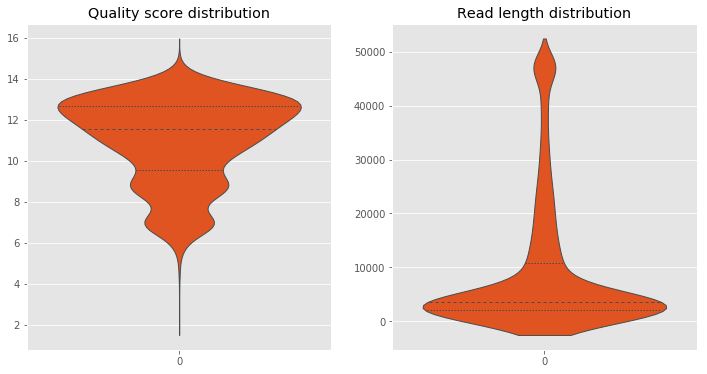

In [11]:
p.overview()

### Analyse the mean read quality distribution

In [12]:
help(pycoQC.reads_qual_bins)

Count the number of reads per interval of sequence quality and return a dataframe

In [13]:
p.reads_qual_bins()

,Count
Sequence quality ranges,
"(-1, 0]",0
"(0, 2]",0
"(2, 4]",42
"(4, 6]",888
"(6, 8]",13520
"(8, 10]",22032
"(10, 12]",39009
"(12, 14]",50354
"(14, 16]",1751


In [14]:
help(pycoQC.reads_qual_distribution)

Plot the distribution of mean read quality

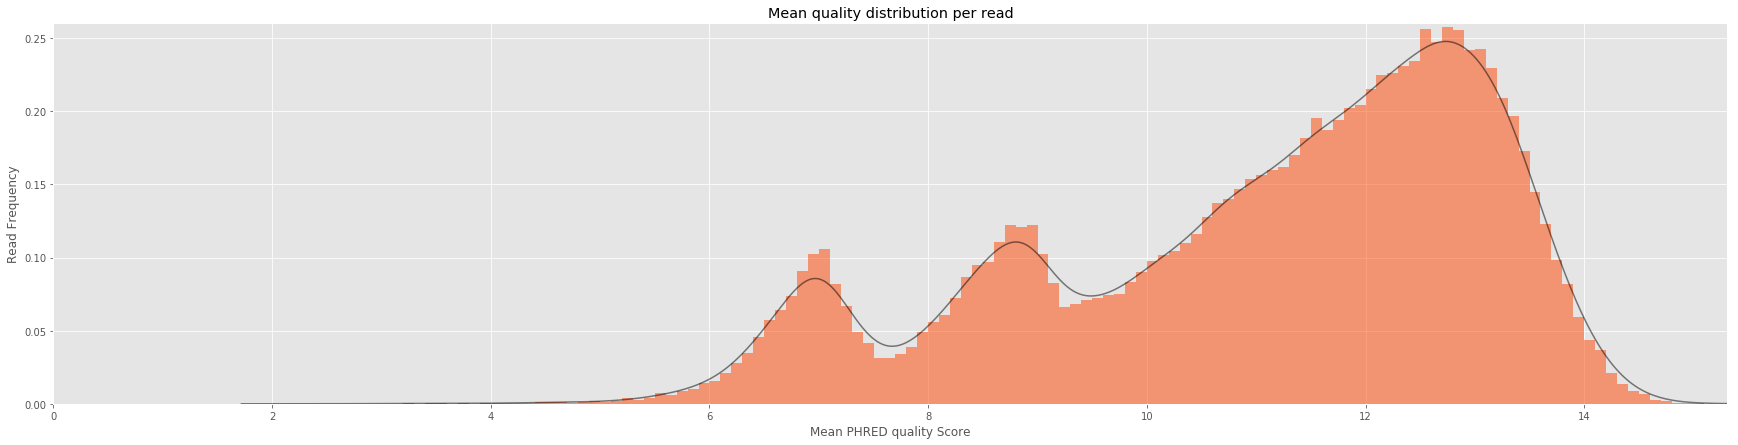

In [15]:
g = p.reads_qual_distribution()

### Analyse the read length distribution

In [16]:
help(pycoQC.reads_len_bins)

Count the number of reads per interval of sequence length and return a dataframe

In [17]:
p.reads_len_bins()

,Count
Sequence lenght ranges,
"(-1, 0]",0
"(0, 25]",185
"(25, 50]",177
"(50, 100]",401
"(100, 500]",5639
"(500, 1000]",12222
"(1000, 5000]",63464
"(5000, 10000]",12010
"(10000, 100000]",33498


In [18]:
help(pycoQC.reads_len_distribution)

Plot the distribution of read length in base pairs

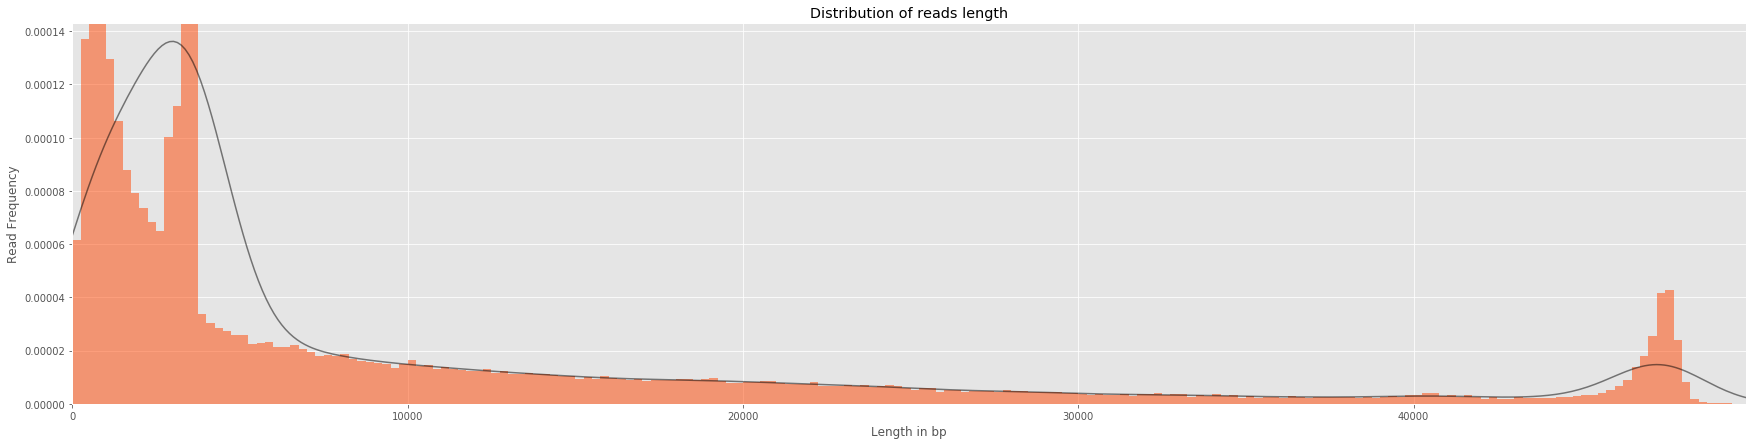

In [19]:
g = p.reads_len_distribution()

### Generate a 2D distribution of read length and mean quality score

In [20]:
help(pycoQC.reads_len_quality)

Draw a bivariate plot of read length vs mean read quality with marginal univariate plots.

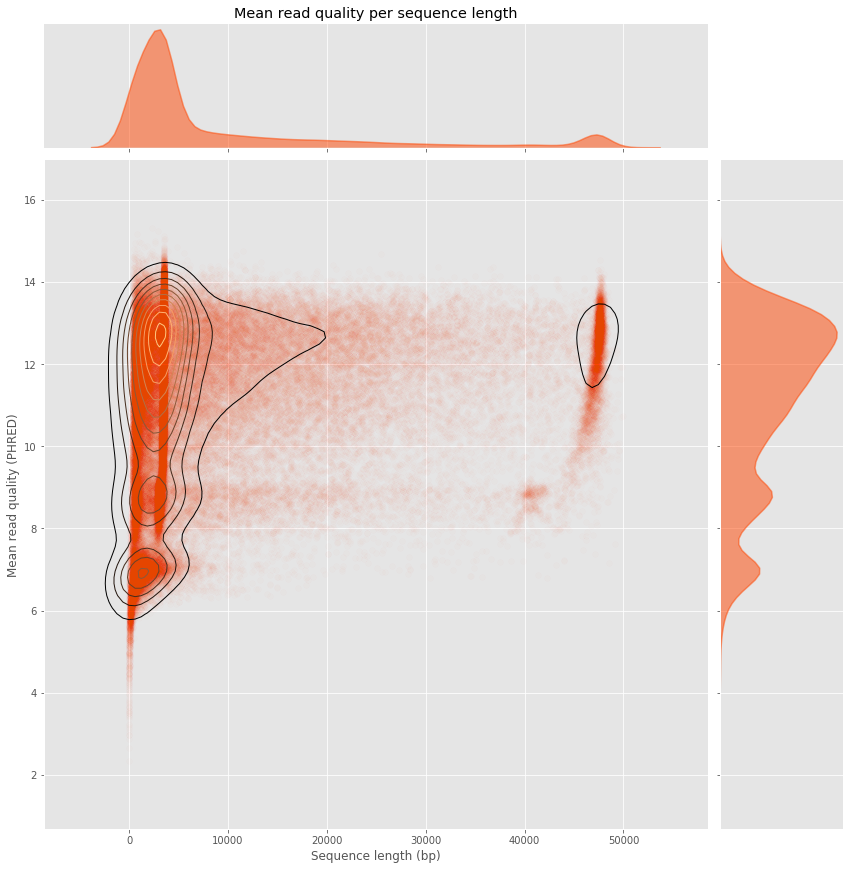

In [21]:
g = p.reads_len_quality()

### Analyse the reads/bases/events output over the time of the run

In [22]:
help(pycoQC.output_over_time)

Plot the output over the time of the experiment at read, base or event level

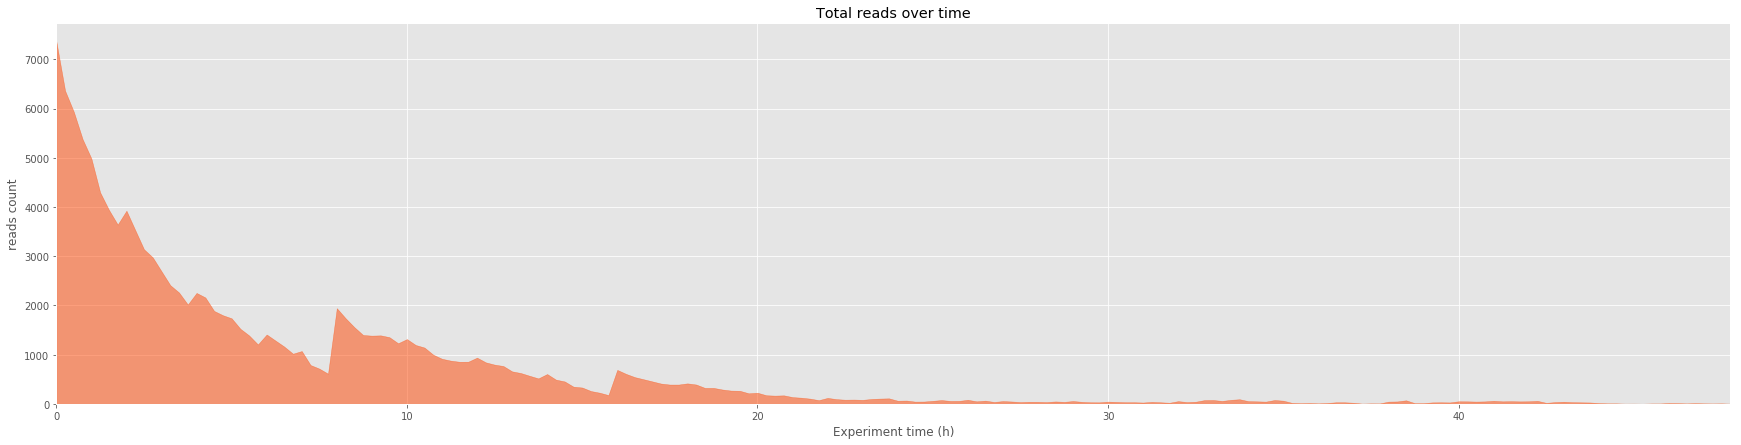

In [23]:
g = p.output_over_time()

### Analyse the evolution of the mean read quality over the time of the run

In [24]:
help(pycoQC.quality_over_time)

Plot the evolution of the mean read quality over the time of the experiment at read, base or event level

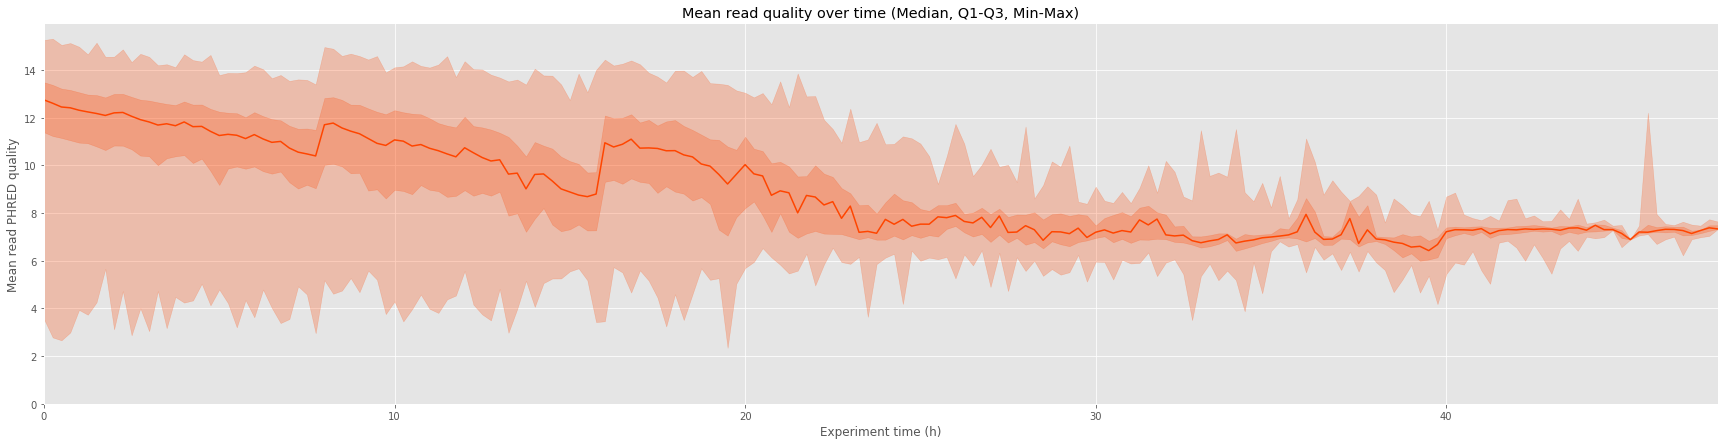

In [25]:
g = p.quality_over_time()

### Overview of the activity of flowcell channels

In [26]:
help(pycoQC.channels_activity)

Plot the activity of channels at read, base or event level. The layout does not represent the physical layout of the flowcell

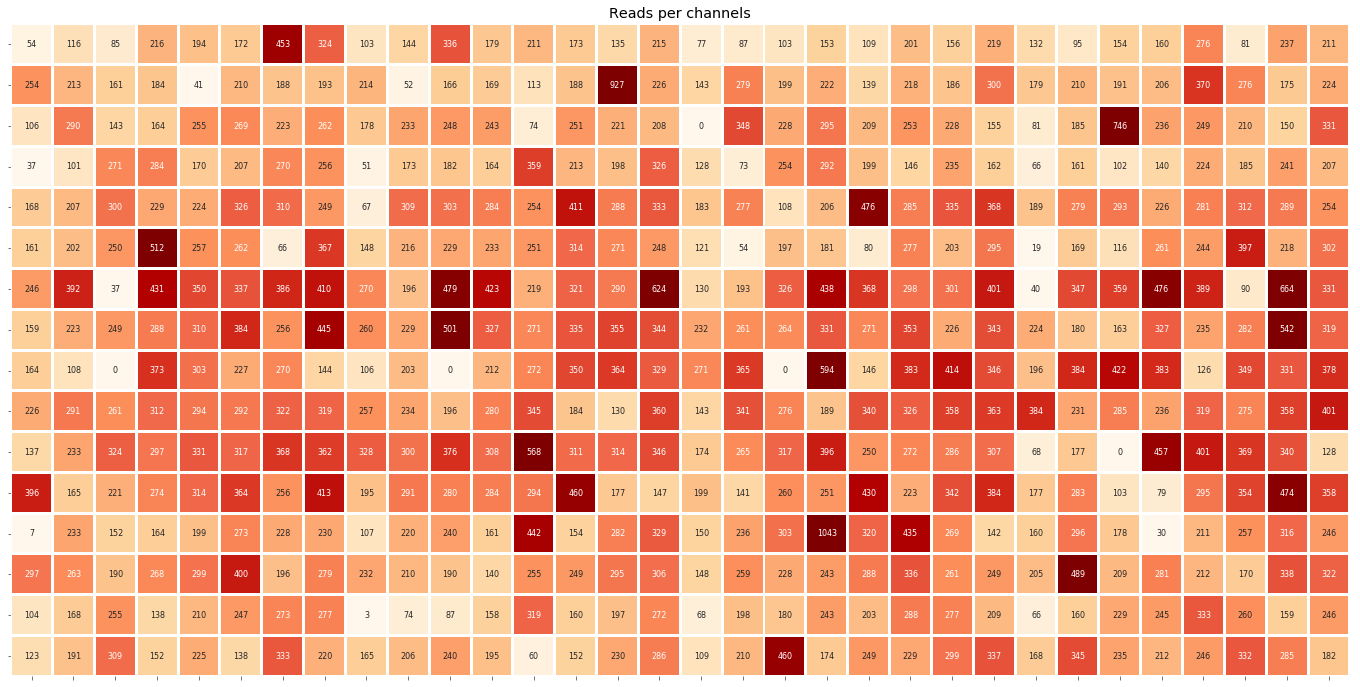

In [27]:
g = p.channels_activity()

# Note to developers

You are welcome to contribute by requesting additional functionalities, reporting bugs or by forking, and submitting a pull request.

If you want to go all the way to the pull request, I would appreciate if you could do it to my development fork (https://github.com/a-slide/pycoQC), rather than directly on the master team repository (https://github.com/EnrightLab/pycoQC).

Thank you

# Authors and Contact

Adrien Leger - 2017

Enright's group, EMBL EBI

* <aleg@ebi.ac.uk>
* [a_slide@Github](https://github.com/a-slide)
* [AdrienLeger2@Twitter ](https://twitter.com/AdrienLeger2)

### Contributors

Jon Sanders [Github](https://github.com/tanaes)

### Acknowledgments

Thanks to [Kim Judge](https://twitter.com/kim_judge_) and [Martin Smith](https://twitter.com/martinalexsmith) for the example sequencing summary files.